In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('hour.csv')
df.head()
#df = pd.DataFrame(dt['casual'], dt['registered'])
#dt['registered'].max()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


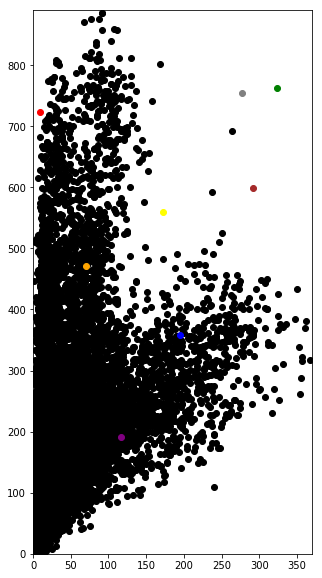

In [8]:
#df = pd.DataFrame({
#    'x' : [12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
#    'y' : [39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
#})
np.random.seed(0)
k = 8
centroids_list = { i+1: [np.random.randint(0,370), np.random.randint(0,890)] for i in range(k)}
fig = plt.figure(figsize = (5,10))
plt.scatter(df['casual'], df['registered'], color ='k')
colmap = {1: 'yellow', 2: 'purple', 3: 'green', 4:'blue', 5:'red', 6:'grey', 7:'brown', 8:'orange'}
#for i in centroids_list:
    #x = i.keys()
    #y = i.values()
 #   plt.scatter(centroids_list.keys(),centroids_list.values(),color=colmap[i])
#for i in centroids_list:
#    print(*centroids_list[i])
for i in centroids_list:
    plt.scatter(*centroids_list[i], color =colmap[i])
plt.xlim(0,370)
plt.ylim(0,890)
plt.show()

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit   ...    distancebetween1  distancebetween2  distancebetween3  \
0           1   ...          571.556646        212.219226        815.414005   
1           1   ...          551.928437        193.600103        795.981156   
2           1   ...          557.595732        199.421664        801.760563   
3           1   ...          574.423189        214.755675        818.174187   
4           1   ...          583.907527        223.986607        827.630956   

   distancebetween4  distancebetween5  distancebetween6 

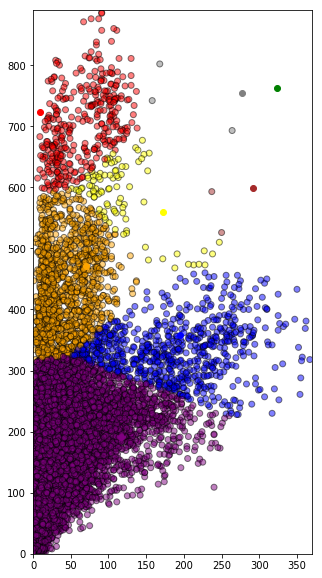

In [4]:
def assignment(df,centroids_list):
    for i in centroids_list.keys():
        df['distancebetween{}'.format(i)] = (np.sqrt(((df['casual'] - centroids_list[i][0]) ** 2) + ((df['registered'] - centroids_list[i][1]) ** 2)))
    centroid_distance_cols = ['distancebetween{}'.format(i) for i in centroids_list.keys()]
    df['closet'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closet'] = df['closet'].map(lambda x: int(x.lstrip('distancebetween')))
    df['color'] = df['closet'].map(lambda x:colmap[x])
    return df

df = assignment(df, centroids_list)
print(df.head())
fig = plt.figure(figsize = (5,10))
plt.scatter(df['casual'], df['registered'], color = df['color'], alpha = 0.5, edgecolor = 'k')
for i in centroids_list:
    plt.scatter(*centroids_list[i], color=colmap[i])
plt.xlim(0,370)
plt.ylim(0,890)
plt.show()

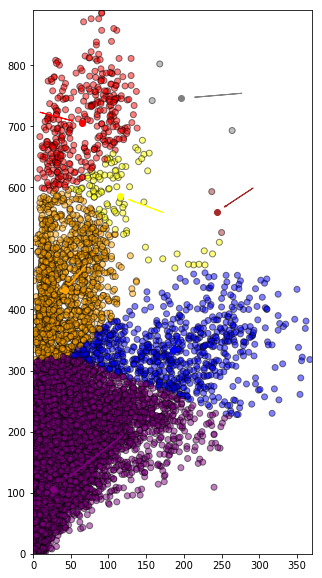

In [5]:
import copy 
old_centroids_list = copy.deepcopy(centroids_list)

def update(k):
    for i in centroids_list:
        centroids_list[i][0] = np.mean(df[df['closet'] == i]['casual'])
        centroids_list[i][1] = np.mean(df[df['closet'] == i]['registered'])
    return k

centroids_list = update(centroids_list)
fig = plt.figure(figsize=(5,10))
ax = plt.axes()
plt.scatter(df['casual'], df['registered'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids_list:
    plt.scatter(*centroids_list[i], color=colmap[i])
plt.xlim(0,370)
plt.ylim(0,890)
for i in old_centroids_list:
    old_x = old_centroids_list[i][0]
    old_y = old_centroids_list[i][1]
    dx = (centroids_list[i][0] - old_centroids_list[i][0]) * 0.75
    dy = (centroids_list[i][1] - old_centroids_list[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

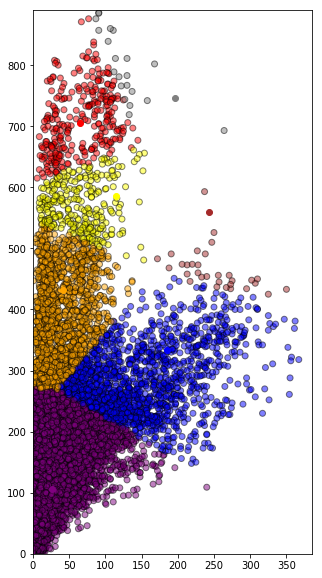

In [6]:
df = assignment(df, centroids_list)

fig = plt.figure(figsize =(5,10))
plt.scatter(df['casual'], df['registered'], color=df['color'], alpha = 0.5, edgecolor= 'k')
for i in centroids_list:
    plt.scatter(*centroids_list[i], color=colmap[i])
plt.xlim(0.370)
plt.ylim(0,890)
plt.show()

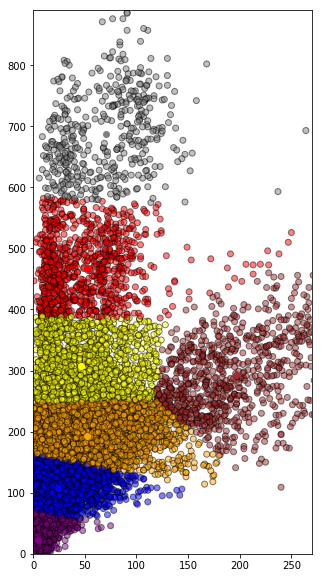

In [7]:
while True:
    closet_centroids_list = df['closet'].copy(deep=True)
    centroids_list = update(centroids_list)
    df = assignment(df, centroids_list)
    if closet_centroids_list.equals(df['closet']):
        break
        
fig = plt.figure(figsize=(5,10))
plt.scatter(df['casual'], df['registered'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids_list:
    plt.scatter(*centroids_list[i], color= colmap[i])
plt.xlim(0,270)
plt.ylim(0,890)
plt.show()